<a href="https://colab.research.google.com/github/praveentn/hgwxx7/blob/master/transferlearning/obj_detection_frcnn_resnet_detecto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install detecto

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


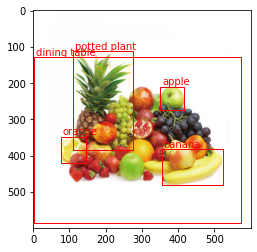

In [2]:
from detecto import core, utils, visualize

image = utils.read_image('https://www.hellocig.com/media/catalog/product/cache/1/image/600x/9df78eab33525d08d6e5fb8d27136e95/f/r/fruits_1.jpg')
model = core.Model()

labels, boxes, scores = model.predict_top(image)
visualize.show_labeled_image(image, boxes, labels)

In [3]:
import torch

print(torch.cuda.is_available())

True


In [4]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/Detecto Tutorial')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!git clone https://github.com/praveentn/images.git

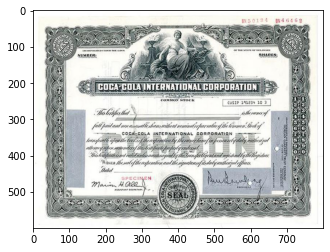

In [6]:
import matplotlib.pyplot as plt
from detecto.utils import read_image

image = read_image('/content/drive/My Drive/Detecto Tutorial/images/images/011.jpg')
plt.imshow(image)
plt.show()

In [0]:
# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/content/drive/My Drive/Detecto Tutorial/images'

os.chdir(WORKING_DIRECTORY)

In [8]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls

images	train.csv  train_labels  val.csv  val_labels


In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

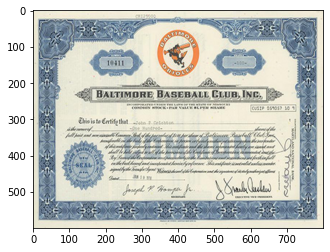

In [10]:
image = utils.read_image('images/023.jpg')
plt.imshow(image)
plt.show()

In [0]:
## Do this twice: once for our training labels and once for our validation labels
#utils.xml_to_csv('train_labels', 'train.csv')
#utils.xml_to_csv('val_labels', 'val.csv')

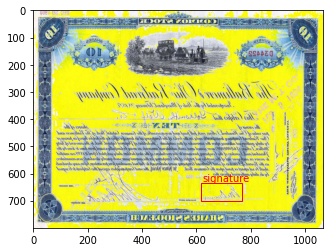

In [12]:
# Specify a list of transformations for our dataset to apply on our images
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('train.csv', 'images/', transform=transform_img)

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

In [0]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)


In [0]:
# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['issuer', 'shares', 'signature', 'stamp'])

In [15]:
model

Epoch 1 of 10
Loss: nan
Epoch 2 of 10
Loss: nan
Epoch 3 of 10
Loss: nan
Epoch 4 of 10
Loss: nan
Epoch 5 of 10
Loss: nan
Epoch 6 of 10
Loss: nan
Epoch 7 of 10
Loss: nan
Epoch 8 of 10
Loss: nan
Epoch 9 of 10
Loss: nan
Epoch 10 of 10
Loss: nan


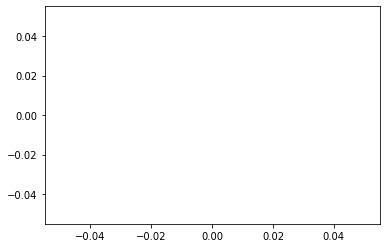

In [16]:
# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

RuntimeError: ignored

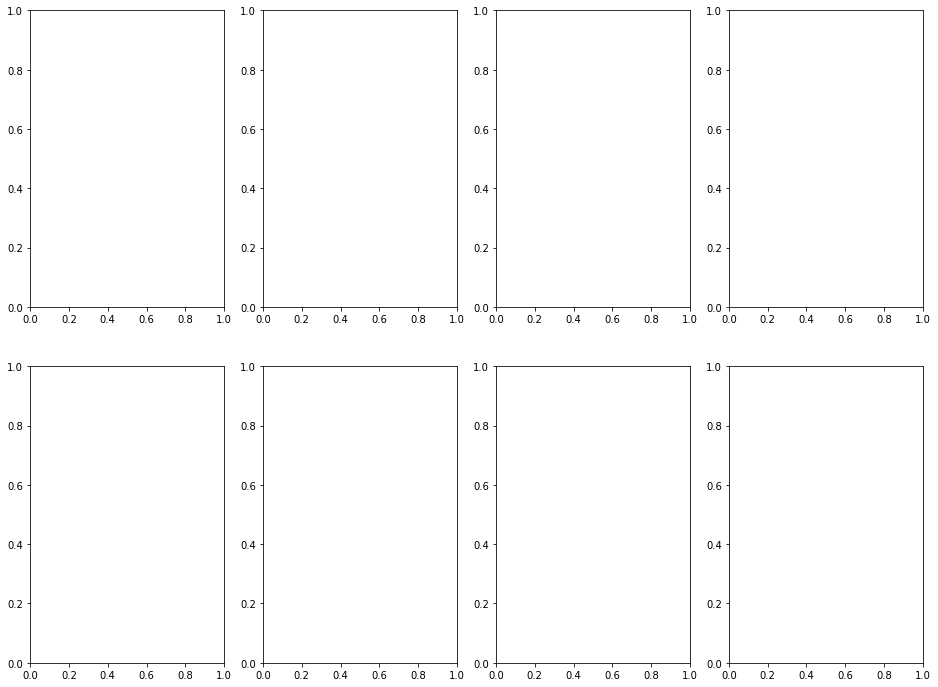

In [44]:
images = []
# Create a list of images 0, 5, 10, ... 40 from val_dataset
for i in range(0, 8, 1):
    image, _ = val_dataset[i]
    images.append(image)

#images = images[:4]

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(2, 4), figsize=(16, 12))

In [37]:
len(images)

4

RuntimeError: ignored

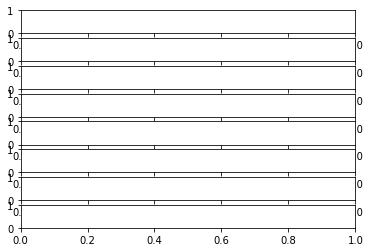

In [45]:
visualize.plot_prediction_grid(model, images)